## Import Modules

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg
from sklearn import tree
import pydotplus
sns.set()

## Look into the data

In [17]:
raw_data= pd.read_csv('titanic.csv')

In [18]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
raw_data.info()
100*raw_data.isnull().sum()/raw_data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

We are missing 77.5% of our cabin data, therefore it is probably best to drop that column. We will impute the missing Ages and Fare columns. We will also need to one hot encode or drop on the columns which are an object type (Name, Sex, and Ticket, Cabin, Embarked)

We can drop the Name column, but it would be nice to keep the title column as it might help us estimate the missing ages

## Process the Data

In [20]:
df = raw_data.copy()

### Name Column

In [21]:
# For the Name Column
#Strip all white space 
df['Name'] = df['Name'].str.replace(" ","",regex=True)
#Replace all periods with commas
df['Name'] = df['Name'].str.replace(".",",",regex=True)
#Split the Name column
df[['Last Name','Title',"First Name","Remainder"]] = df['Name'].str.split(',',expand=True)
# Drop unneeded columns
df = df.drop(columns = ['Cabin','Name','First Name','Remainder','Ticket','Embarked'])

In [22]:
cols = ['PassengerId', 'Title','Last Name','Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare','Survived']
df = df[cols]
df

,PassengerId,Title,Last Name,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,Mr,Braund,3,male,22.0,1,0,7.2500,0
1,2,Mrs,Cumings,1,female,38.0,1,0,71.2833,1
2,3,Miss,Heikkinen,3,female,26.0,0,0,7.9250,1
3,4,Mrs,Futrelle,1,female,35.0,1,0,53.1000,1
4,5,Mr,Allen,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
1304,1305,Mr,Spector,3,male,NaN,0,0,8.0500,0
1305,1306,Dona,OlivayOcana,1,female,39.0,0,0,108.9000,1
1306,1307,Mr,Saether,3,male,38.5,0,0,7.2500,0
1307,1308,Mr,Ware,3,male,NaN,0,0,8.0500,0


#### Titles

In [23]:
def honorific_map(df):
    title_cat = ['Title','Entries','Max','Min','Avg','Sex']
    title_df = pd.DataFrame(columns = title_cat)

    for title in df['Title'].unique():
        ent = len(df.loc[(df['Title'] == title)]['Age'])
        maxim = df.loc[(df['Title'] == title)]['Age'].max()
        minim = df.loc[(df['Title'] == title)]['Age'].min()
        avg = df.loc[(df['Title'] == title)]['Age'].mean()
        sex = df.loc[(df['Title'] == title)]['Sex'].unique()
        df_new = {'Title':title,'Entries':ent,'Max':maxim,'Min':minim,'Avg':avg,'Sex':sex}
        title_df = title_df.append(df_new, ignore_index = True)
    
    return title_df

honorific_map(df)

,Title,Entries,Max,Min,Avg,Sex
0,Mr,757,80.0,11.00,32.252151,[male]
1,Mrs,197,76.0,14.00,36.994118,[female]
2,Miss,260,63.0,0.17,21.774238,[female]
3,Master,61,14.5,0.33,5.482642,[male]
4,Don,1,40.0,40.00,40.000000,[male]
5,Rev,8,57.0,27.00,41.250000,[male]
6,Dr,8,54.0,23.00,43.571429,"[male, female]"
7,Mme,1,24.0,24.00,24.000000,[female]
8,Ms,2,28.0,28.00,28.000000,[female]
9,Major,2,52.0,45.00,48.500000,[male]


In [32]:
#Create a dictionary for all titles/honorifics that contain only one sex
honorifics = {}

mr = ['Mr','Don', 'Rev','Major','Sir','Col','Capt','Jonkheer']
mrs = ['Mrs','Mme','theCountess','Dona','Lady']
miss = ['Miss','Mlle','Ms']
master = ['Master']
for key in mr:
    honorifics[key] = "Mr"
for key in miss:
    honorifics[key] = "Miss"
for key in mrs:
    honorifics[key] = "Mrs"
for key in master:
    honorifics[key] = "Master"

#map the dictionary across the title field
df["Title"] = df["Title"].map(honorifics)

#all titles/honorifics that contained both sexes are now marked as NaN
for i,j in enumerate(df['Title']):
    if df.loc[i,'Title'] not in ['Mr','Mrs','Miss','Master']:
        if df.loc[i,'Sex'] == 'male':
            df.loc[i,'Title'] = 'Mr'
        else:
            df.loc[i,'Title'] = 'Mrs'

df["Title"].unique()
title_df = honorific_map(df)
title_df

,Title,Entries,Max,Min,Avg,Sex
0,Mr,782,80.0,11.00,32.784298,[male]
1,Mrs,202,76.0,14.00,37.040000,[female]
2,Miss,264,63.0,0.17,21.824366,[female]
3,Master,61,14.5,0.33,5.482642,[male]


Text(0.5, 1.0, 'Master')

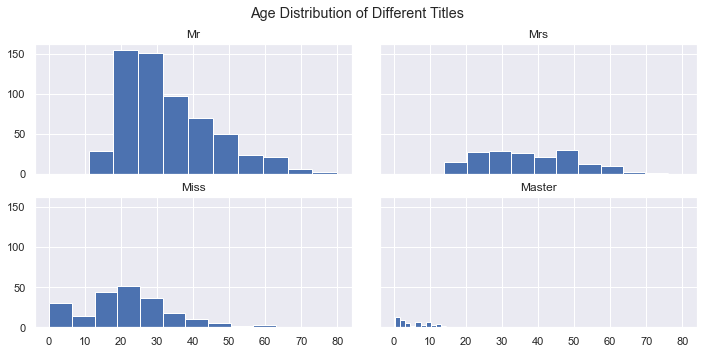

In [62]:
fig, axs = plt.subplots(2, 2,figsize=(10,5),sharex=True, sharey=True)
fig.suptitle('Age Distribution of Different Titles')
fig.tight_layout()
axs[0,0].hist(df[df['Title'] == 'Mr']['Age'].dropna().tolist())
axs[0,0].set_title("Mr")
axs[0,1].hist(df[df['Title'] == 'Mrs']['Age'].dropna().tolist())
axs[0,1].set_title("Mrs")
axs[1,0].hist(df[df['Title'] == 'Miss']['Age'].dropna().tolist())
axs[1,0].set_title("Miss")
axs[1,1].hist(df[df['Title'] == 'Master']['Age'].dropna().tolist())
axs[1,1].set_title("Master")

 We'll store the average ages and use them to fill the missing values after splitting the data

In [25]:
mr_age = df[df['Title']=='Mr']['Age'].mean()
mrs_age = df[df['Title']=='Mrs']['Age'].mean()
miss_age = df[df['Title']=='Miss']['Age'].mean()
master_age = df[df['Title']=='Master']['Age'].mean()

## CHECKPOINT

In [59]:
df_1 = df.copy()

### Family Columns